In [17]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ , QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-12-02 13:56:44,527: Credentials are already in use. The existing account in the session will be replaced.


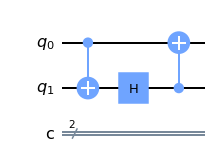

In [2]:
qic=QuantumCircuit(2,2)
qic.cx(0,1)
qic.h(1)
qic.cx(1,0)

qic.draw()

In [4]:
from qiskit.quantum_info import Statevector
state3=Statevector.from_int(1,4)
state3=state3.evolve(qic)
state3.draw('latex')

<IPython.core.display.Latex object>

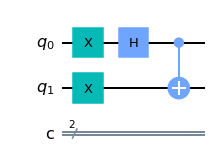

In [5]:
cir= QuantumCircuit(2,2)
cir.x(0)
cir.x(1)
cir.h(0)
cir.cx(0,1)
cir.draw()

In [6]:
state2 = Statevector.from_int(1,4)
state2 =state2.evolve(cir)
state2.draw('latex')

<IPython.core.display.Latex object>

In [13]:
from qiskit.quantum_info import DensityMatrix
rho_AB = DensityMatrix.from_instruction(qic)

rho_AB.draw('latex',prefix ='\\rho_{AB}')

<IPython.core.display.Latex object>

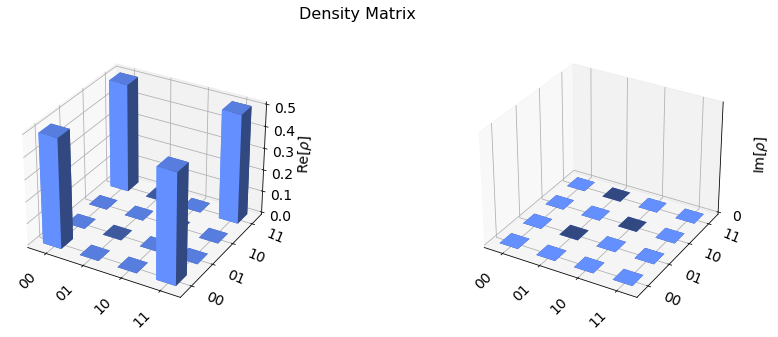

In [15]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title = "Density Matrix")

In [18]:
qr=QuantumRegister(2)

circ=QuantumCircuit(qr)

circ.h(qr[0])

circ.cx(qr[0],qr[1])

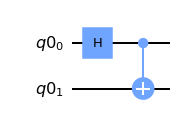

In [19]:
circ.draw()

In [22]:
DM=DensityMatrix.from_instruction(circ)
DM.draw('latex',prefix='\\rho_{AB}')

<IPython.core.display.Latex object>

In [24]:
print(DM.data)

[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


In [27]:
from qiskit.quantum_info import partial_trace
PT=partial_trace(DM,[0])

print (PT.data)

[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


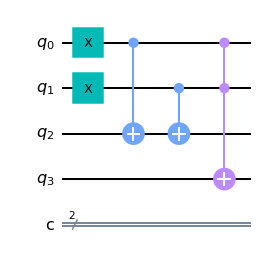

In [31]:
#Half Adder
qc = QuantumCircuit(4,2)
#encode input in qubits zero and one
qc.x(0)
qc.x(1)
#cnot to write xor output in qubit 2
qc.cx(0,2)
qc.cx(1,2)
#ccx to write the AND of the imputs in 2
qc.ccx(0,1,3)
qc.draw()

In [32]:
qc.measure(2,0) #xor value

In [33]:
qc.measure(3,1) #and value

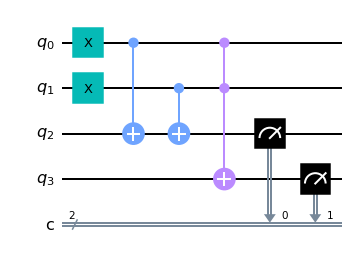

In [34]:
qc.draw('mpl')

{'10': 1024}


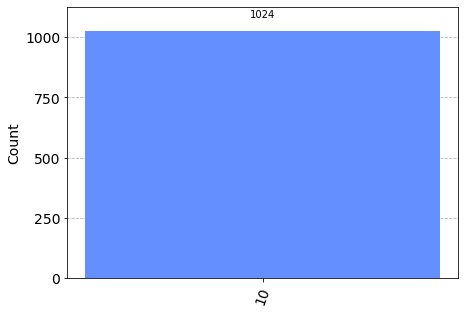

In [39]:
from qiskit import execute
backend = Aer.get_backend('qasm_simulator')
results =execute(qc, backend = backend , shots = 1024).result()
counts = results.get_counts(qc)
print(counts)
plot_histogram(counts)

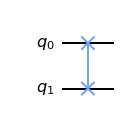

In [40]:
#swap
qc = QuantumCircuit(2)
qc.swap(0,1)
qc.draw()

In [41]:
rho_AB = DensityMatrix.from_instruction(qc)

rho_AB.draw('latex', prefix = '\\rho_{AB}')

<IPython.core.display.Latex object>

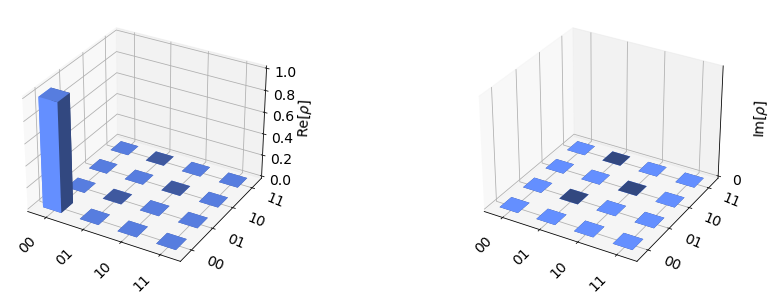

In [42]:
Statevector(qc).draw('city')

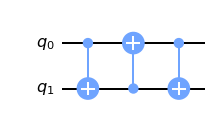

In [43]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.draw()

In [44]:
rho_AB = DensityMatrix.from_instruction(qc)
rho_AB.draw('latex',prefix = '\\rho_{AB}')

<IPython.core.display.Latex object>

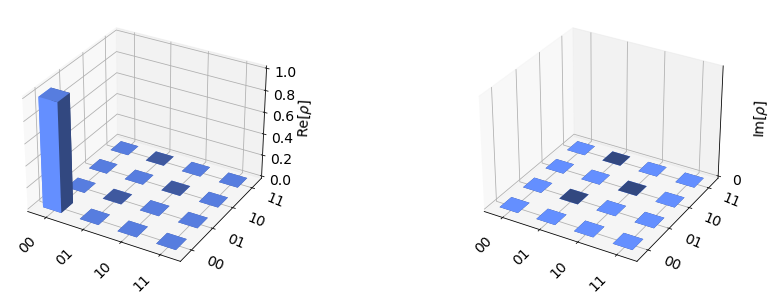

In [45]:
Statevector(qc).draw('city')